# Python and R

In [6]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python and filters down to presidential general election polls only:

In [8]:

df = pd.read_csv('raw-polls.csv')\
    .query("type_simple=='Pres-G'")
df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
470,6478,7947,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,10/17/00,1200.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,44.0,5.0,-1.0,11/7/00,48.31,47.79,0.51,-1.51,0.0,for Reuters | MSNBC
471,6483,7952,815,2000,2000_Pres-G_FL,FL,Pres-G,Pres-G,McLaughlin & Associates,203,Live Phone,R,10/17/00,600.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,44.0,3.0,-1.0,11/7/00,48.84,48.85,-0.01,-0.99,1.0,for Bill McCollum
472,6470,7939,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,KRC Research,160,Live Phone,NaN,10/17/00,600.0,Al Gore,222,DEM,45.0,George W. Bush,241,REP,43.0,4.0,2.0,11/7/00,54.60,42.58,12.01,-10.01,1.0,NaN
473,6473,7942,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,10/17/00,601.0,Al Gore,222,DEM,47.0,George W. Bush,241,REP,40.0,3.0,7.0,11/7/00,54.60,42.58,12.01,-5.01,1.0,NaN
474,6474,7943,836,2000,2000_Pres-G_NH,NH,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,10/17/00,603.0,Al Gore,222,DEM,44.0,George W. Bush,241,REP,41.0,1.0,3.0,11/7/00,46.80,48.07,-1.27,4.27,0.0,NaN


The cell below loads the same data in R and applies the same filter:

In [9]:
%%R

df <- read_csv('raw-polls.csv') %>%
    filter(type_simple == 'Pres-G')
df

Rows: 10776 Columns: 31
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 2,940 x 31
   poll_id questio~1 race_id  year race  locat~2 type_~3 type_~4 polls~5 polls~6
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    6478      7947      40  2000 2000~ US      Pres-G  Pres-G  Zogby ~     395
 2    6483      7952     815  2000 2000~ FL      Pres-G  Pres-G  McLaug~     203
 3    6470      7939     820  2000 2000~ IL      Pres-G  Pres-G  KRC Re~     160
 4    6473      7942     820  2000 2000~ IL      Pres-G  Pres-G  Resear~     281
 5    6474      7943     836  2000 2000~ NH      Pres-G 

# Example Charts

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

note: This section is just example charts. You don't have to do anything here, just leave these charts as a starting point for you to copy/paste later. Scroll to the next section to get down to work!


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


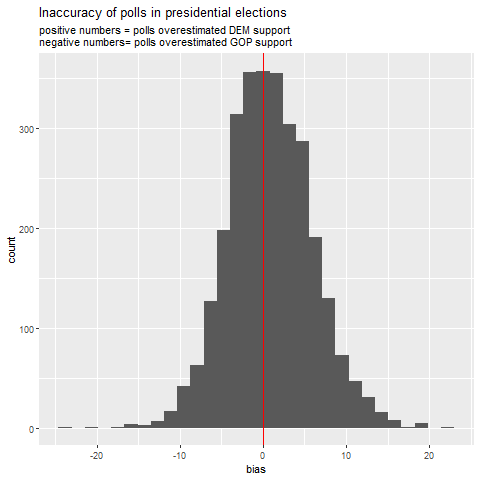

In [11]:
%%R

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


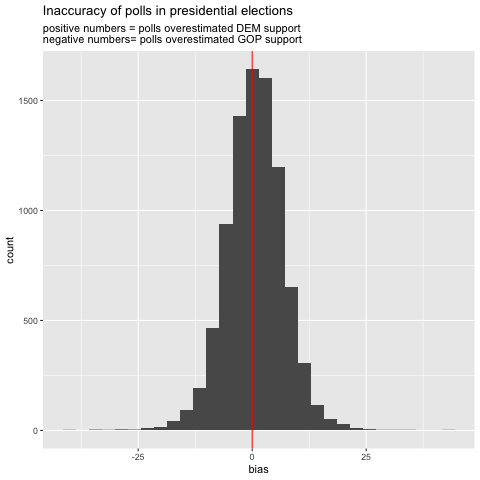

In [6]:
%%R 

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


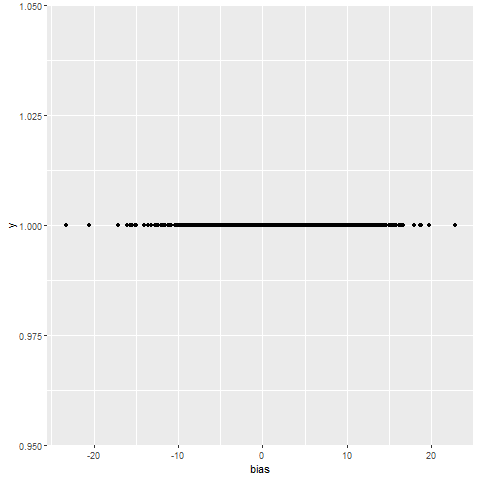

In [17]:
%%R 

ggplot(df) +
    aes(x=bias, y=1) + 
    geom_point() 

In [18]:
%%R

dfcolnames <- colnames(df)
dfcolnames

 [1] "poll_id"            "question_id"        "race_id"           
 [4] "year"               "race"               "location"          
 [7] "type_simple"        "type_detail"        "pollster"          
[10] "pollster_rating_id" "methodology"        "partisan"          
[13] "polldate"           "samplesize"         "cand1_name"        
[16] "cand1_id"           "cand1_party"        "cand1_pct"         
[19] "cand2_name"         "cand2_id"           "cand2_party"       
[22] "cand2_pct"          "cand3_pct"          "margin_poll"       
[25] "electiondate"       "cand1_actual"       "cand2_actual"      
[28] "margin_actual"      "bias"               "rightcall"         
[31] "comment"           


# Exploratory Data Visualization

In this section you'll make a few charts to explore the data. For each chart, write a short explanation of what you think you can and cannot conclude from the chart.

## I couldn't really get hang of what I should try to plot, but I put together some plots based on stuff we've done before.

### Exploratory chart 1

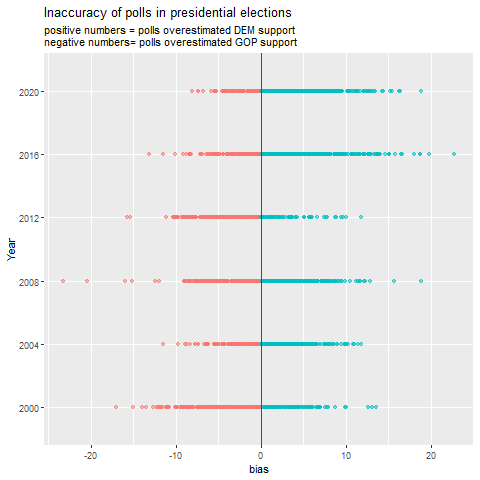

In [13]:
%%R

ggplot(df) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +  
    theme(legend.position="none") +
    scale_y_discrete(name="Year")


👉 Summary

##### It appears that in some presidential election years the polls are biased more pronouncedly for the Republican candidate, while in other years the polls are biased more pronouncedly toward the Democratic candidate.
👉 Reflection

What I can conclude based on this chart:
* In 2004 the polls margins were less off the in many other years, and there were hardly any outliers.
* 

What I can't conclude based on this chart:
* How accurate are the pollsters in general.
* TKTK
* TKTK



### Exploratory chart 2

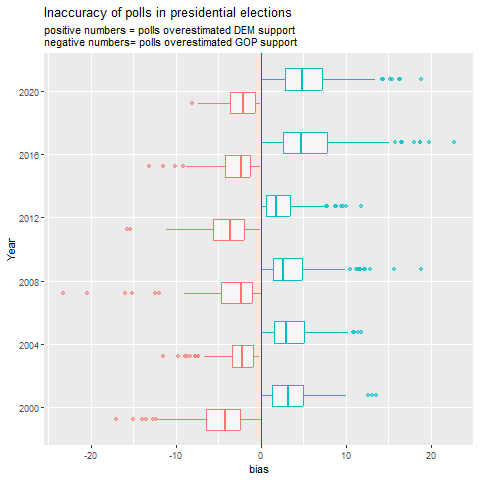

In [14]:
%%R

ggplot(df) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) +
    geom_boxplot() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +  
    theme(legend.position="none") +
    scale_y_discrete(name="Year")


👉 Summary

Half of the polls who overestimated the demoractic victory in 2012 elections showed much smaller bias in their margin of error that polls who overestimated the democratice victory in 2016 elections.

👉 Reflection

What I can conclude based on this chart:
* In some elections the polls concenrated more closely inside a narrower margin of error.


What I can't conclude based on this chart:
* Which candidate won the election or which polls predict the winner.



### Exploratory chart 3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


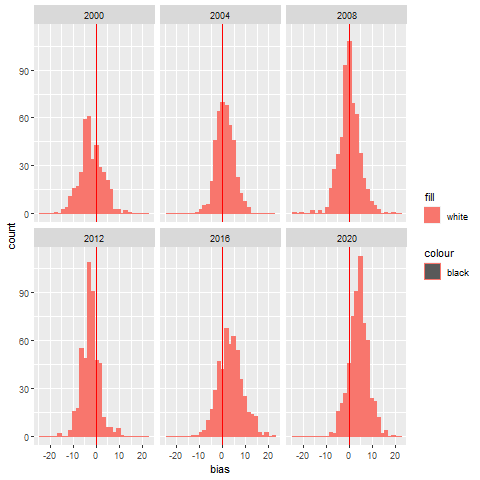

In [38]:
%%R

ggplot(df) +
    geom_histogram(aes(x=bias, binwidth = 10, color='black', fill='white')) +
    facet_wrap(~year) +
    geom_vline(aes(xintercept=0), color='red')  
    #labs(
        #title='Inaccuracy of polls in presidential elections',
        #subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    #) +  
    #theme(legend.position="none") +
    #scale_y_discrete(name="Year")



👉 Summary

In 2004 and 2008 the polls were evenly distributed, with the largest bin straddling zero. In 2012 most polls underestimated democratic victory and in 2020 most polls underestimated the republican victory.

👉 Reflection

What I can conclude based on this chart:
* Polls can be biased, but in some elections they can be evenly distributed.


What I can't conclude based on this chart:
* How accurate are the pollsters in general or who won the election.



# New Questions

Good exploratory viz generates some answers, but usually lots of new questions. 
What new questions do you have now that you've had a chance to do some exploration with the data?

👉

I am still trying to learn basics both in using the tools and what exploratory visualization is. But a general question: what is the first avenue of inquiry? what should I do first?